<a href="https://colab.research.google.com/github/naveenmk404/deep_learning_lab/blob/main/p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Program 4.
Implement a program showcasing multitask learning with early stopping.


Epoch 1/100
25/25 [==============================] - 4s 58ms/step - loss: 0.3140 - output_task1_loss: 0.1126 - output_task2_loss: 0.2014 - output_task1_mae: 0.2784 - output_task2_mae: 0.3687 - val_loss: 0.1988 - val_output_task1_loss: 0.0993 - val_output_task2_loss: 0.0995 - val_output_task1_mae: 0.2689 - val_output_task2_mae: 0.2635
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.1993 - output_task1_loss: 0.0996 - output_task2_loss: 0.0998 - output_task1_mae: 0.2651 - output_task2_mae: 0.2688 - val_loss: 0.1919 - val_output_task1_loss: 0.0932 - val_output_task2_loss: 0.0986 - val_output_task1_mae: 0.2636 - val_output_task2_mae: 0.2657
Epoch 3/100
25/25 [==============================] - 0s 16ms/step - loss: 0.1893 - output_task1_loss: 0.0942 - output_task2_loss: 0.0951 - output_task1_mae: 0.2600 - output_task2_mae: 0.2637 - val_loss: 0.1852 - val_output_task1_loss: 0.0904 - val_output_task2_loss: 0.0949 - val_output_task1_mae: 0.2609 - val_output_task2_mae: 

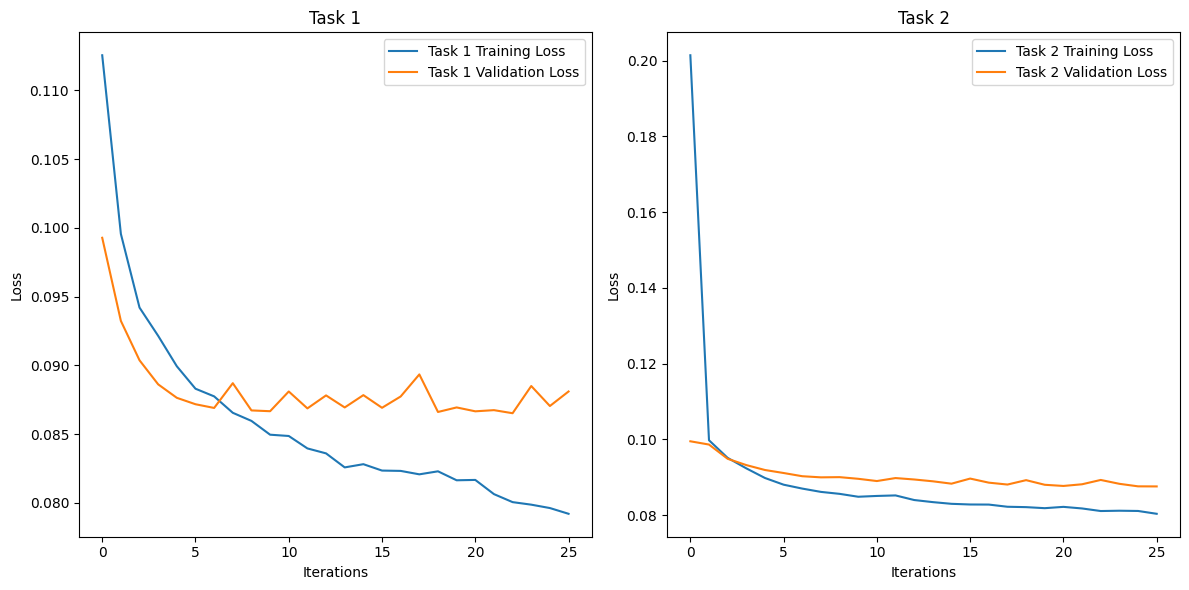

In [1]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Generate some random data for two tasks
num_samples = 1000
input_dim = 10
output_dim_task1 = 1
output_dim_task2 = 1

X = np.random.rand(num_samples, input_dim)
y_task1 = np.random.rand(num_samples, output_dim_task1)
y_task2 = np.random.rand(num_samples, output_dim_task2)

# Define the model architecture
input_layer = Input(shape=(input_dim,))
shared_layer = Dense(64, activation='relu')(input_layer)
output_layer_task1 = Dense(output_dim_task1, activation='linear', name='output_task1')(shared_layer)
output_layer_task2 = Dense(output_dim_task2, activation='linear', name='output_task2')(shared_layer)

model = Model(inputs=input_layer, outputs=[output_layer_task1, output_layer_task2])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model
history = model.fit(X, [y_task1, y_task2], validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

# Plot training history for each task
plt.figure(figsize=(12, 6))

# Plot training history for task 1
plt.subplot(1, 2, 1)
plt.plot(history.history['output_task1_loss'], label='Task 1 Training Loss')
plt.plot(history.history['val_output_task1_loss'], label='Task 1 Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Task 1')
plt.legend()

# Plot training history for task 2
plt.subplot(1, 2, 2)
plt.plot(history.history['output_task2_loss'], label='Task 2 Training Loss')
plt.plot(history.history['val_output_task2_loss'], label='Task 2 Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Task 2')
plt.legend()

plt.tight_layout()
plt.show()
